In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="darkgrid")

## 1. Data Preprocessing

In [115]:
"""
age: The person's age in years
sex: The person's sex (1 = male, 0 = female)
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
chol: The person's cholesterol measurement in mg/dl
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: The person's maximum heart rate achieved
exang: Exercise induced angina (1 = yes; 0 = no)
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
ca: The number of major vessels (0-3)
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
target: Heart disease (0 = no, 1 = yes)
"""
data = pd.read_csv("./heart.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
data = data.astype('float32')
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [27]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623764,246.264023,0.148515,0.528053,149.646866,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032053,17.538143,51.830750,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612276,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


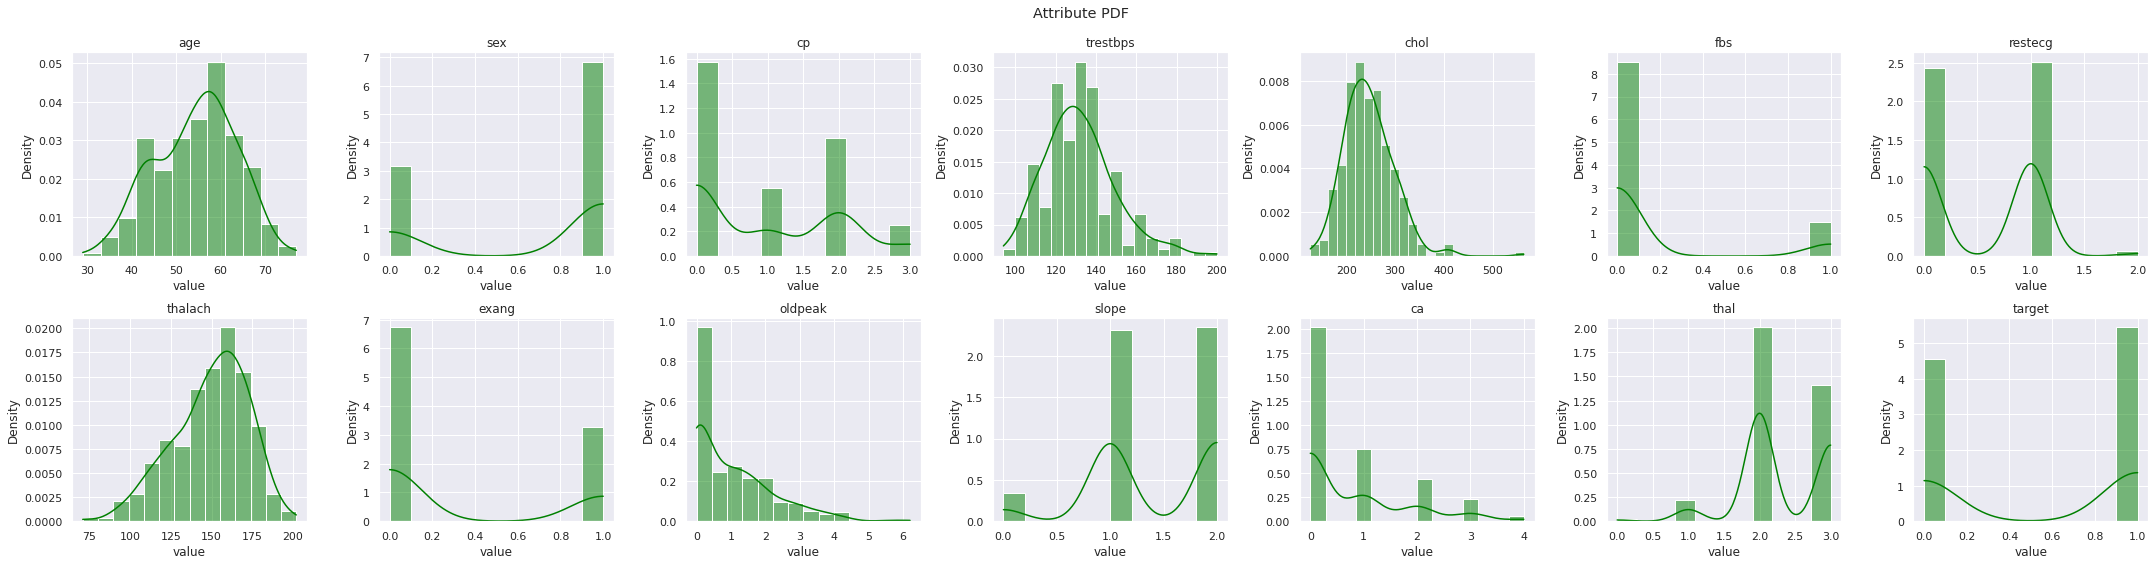

In [114]:
fig = plt.figure(figsize=(30,8))
for index, col_name in enumerate(data.columns.values):
    ax_subplot=plt.subplot(2,7,index+1)
    ax = sns.histplot(data=data[col_name], kde=True, stat='density', color='green')
    ax.set_title(f'{col_name}')
    ax.set_xlabel('value')
fig.suptitle("Attribute PDF")
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

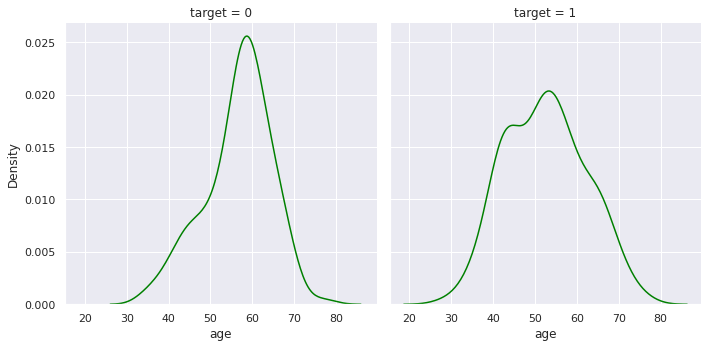

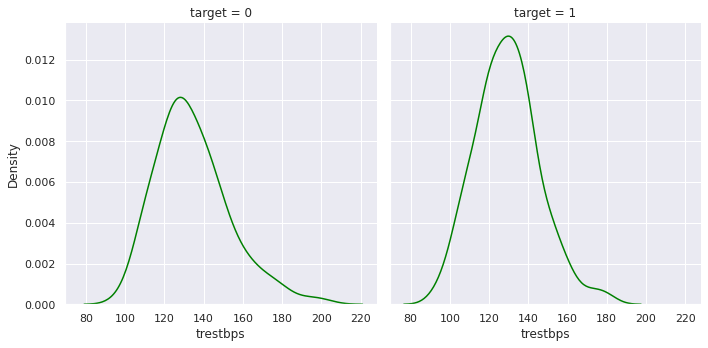

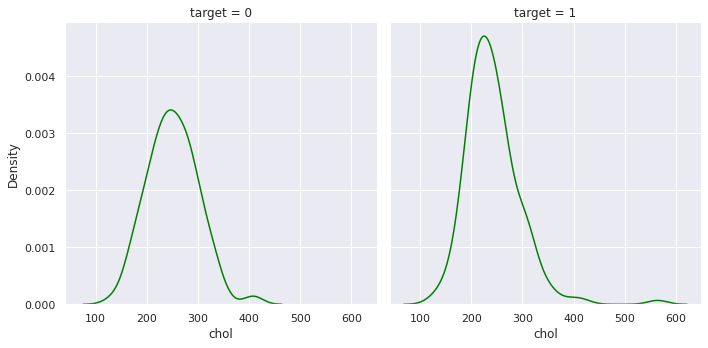

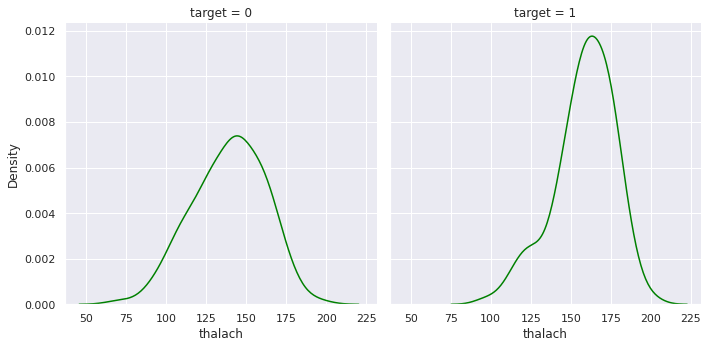

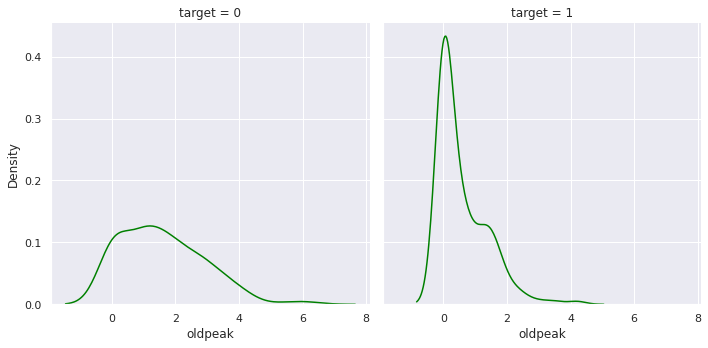

In [116]:
continuous_attr=['age','trestbps','chol','thalach','oldpeak']
for index, attr_name in enumerate(continuous_attr):
    sns.displot(data=data, x=attr_name,col='target', kind='kde',color='green')

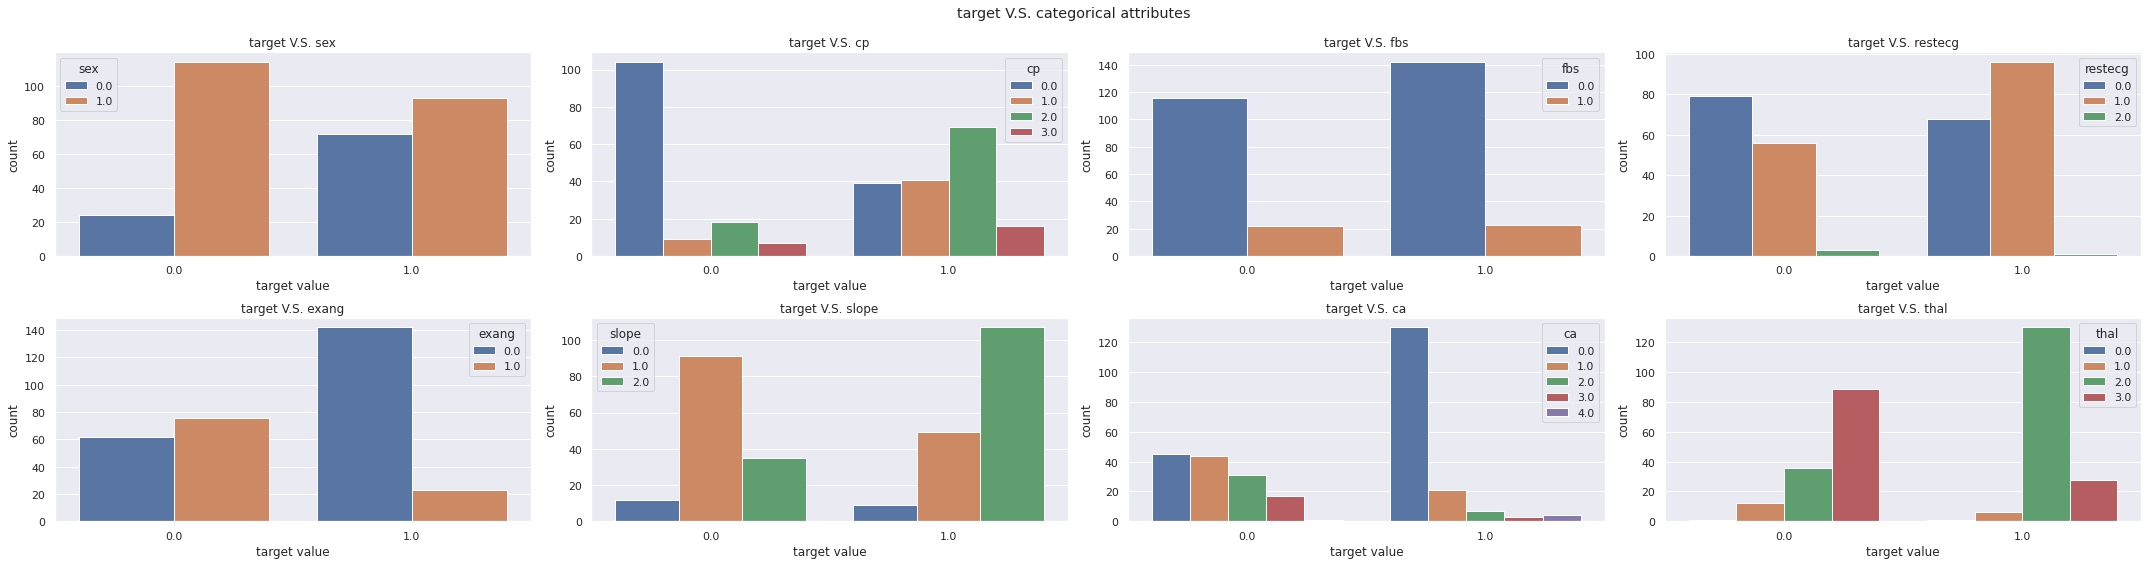

In [113]:
categorical_attr = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal']
fig=plt.figure(figsize=(30,8))
for index, attr_name in enumerate(categorical_attr):
    ax_sub=plt.subplot(2,4,index+1)
    ax = sns.countplot(data=data, x='target', hue=attr_name)
    ax.set_title(f"target V.S. {attr_name}")
    ax.set_xlabel("target value")
fig.suptitle("target V.S. categorical attributes")
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

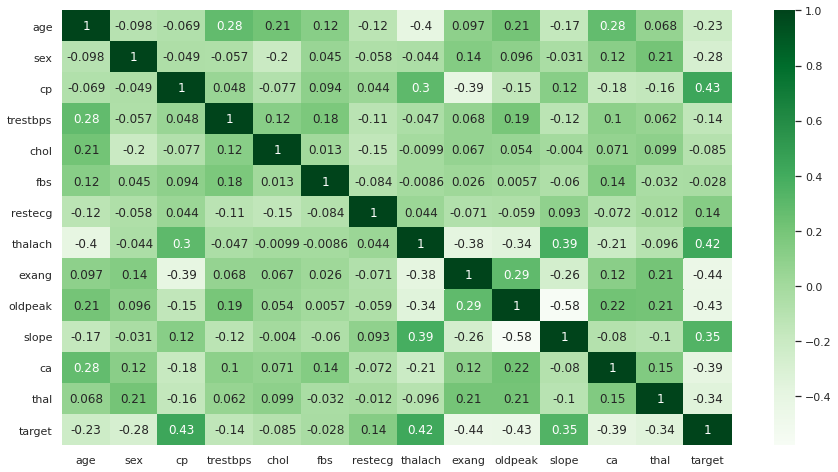

In [112]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Greens')
plt.show()